#  Introduction

* ##  Overview of the Dataset 

The dataset has 17 attributes. These are Gender, Age, Height, Weight, family history with overweight, FAVC(Frequent consumption of high caloric food), FCVC(Frequency of consumption of vegetables), NCP(Number of main meals), CAEC(Consumption of food between meals), SMOKE(smoker or not), CH2O(Consumption of water daily), SCC(Calories consumption monitoring), FAF(Physical activity frequency), TUE(Time using technology devices), CALC(Consumption of alcohol), MTRANS(Transportation used) and NObeyesdad(obesity levels). NObeyesdad(obesity levels) is the target variable. There is an id column which is the same as index number. 
[](http://)

* ## Importing necessary python libraries

In [458]:
 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn import svm # svm = support vector machine
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


* ## Loading the train and test data into panda dataframe 

In [459]:

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
#sample_submission = pd.read_csv('sample_submission.csv')

print ('Train dataframe')
display(train_df)
print ('Test dataframe')
display(test_df)

Train dataframe


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


Test dataframe


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


#### The train dataset has 20,757 rows and 18 columns and the test dataset has 13,840 rows and 17 columns.

#  Exploratory Data Analysis



In [460]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [461]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


#### The age of the population in the dataset ranges from 14 to 61 years of age.

### Checking Null and duplicate values in the train and test datasets

In [462]:
train_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [463]:
train_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

#### There are no missing values in the dataset.

In [464]:
#Checking duplicates in the train and test dataset 
print (f' The train dataset has {train_df.duplicated().sum()} duplicates.')
print (f' The test dataset has {test_df.duplicated().sum()} duplicates.')



 The train dataset has 0 duplicates.
 The test dataset has 0 duplicates.


#### There are no duplicates in the dataset.

### Drop id column and adding BMI(Weight/Height) feature

In [465]:
train_df.drop(columns='id', axis=1, inplace=True)
test_temp = test_df.drop(columns=['id'])

In [466]:
#Computing BMI  

train_df["BMI"] = train_df["Weight"] / np.power(train_df["Height"], 2)
test_temp["BMI"] = test_temp["Weight"] / np.power(test_temp["Height"], 2)

## Distribution of the attributes of the dataset

* ### Distribution of the Population by Age  

<Axes: >

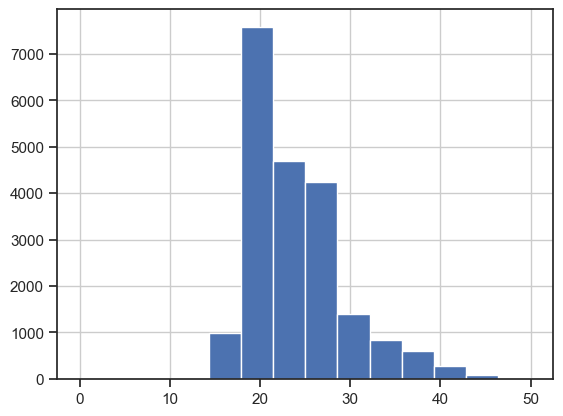

In [467]:
%matplotlib inline
import matplotlib.pyplot as plt
train_df['Age'].dropna().hist(bins=14, range =(0,50), alpha =1.0)


#### The age of the population is normally distributed with slightly left skewed.

* ### Distribution of the Target variable (NObeyesdad)

In [468]:
train_df['NObeyesdad'].value_counts() 

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

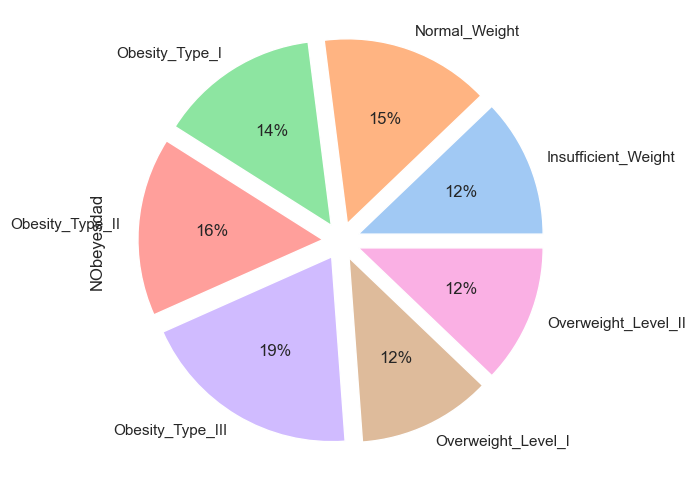

In [469]:
#NObeyesdad Distribution
import seaborn as sns
plt.figure(figsize=(6,6))
palette_color = sns.color_palette('pastel')
explode = [0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1]
train_df.groupby('NObeyesdad')['NObeyesdad'].count().plot.pie(colors=palette_color,explode=explode, autopct="%.f%%");

* ### The Target Variable (NObeyesdad) Vs Gender

[Text(0, 0, 'Overweight_Level_II'),
 Text(1, 0, 'Normal_Weight'),
 Text(2, 0, 'Insufficient_Weight'),
 Text(3, 0, 'Obesity_Type_III'),
 Text(4, 0, 'Obesity_Type_II'),
 Text(5, 0, 'Overweight_Level_I'),
 Text(6, 0, 'Obesity_Type_I')]

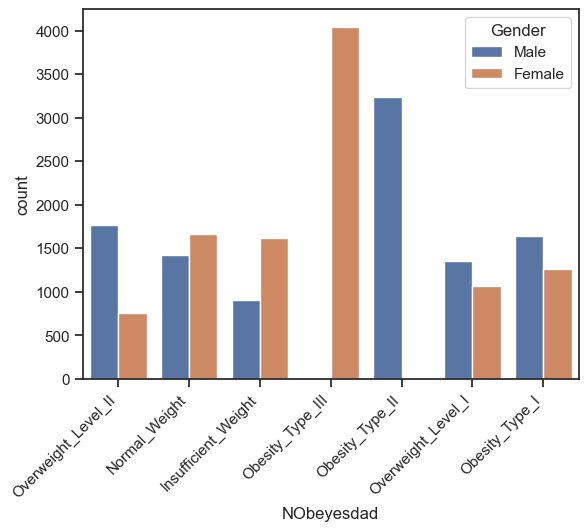

In [470]:
import seaborn as sns
my_plot = sns.countplot(x = "NObeyesdad", data = train_df, width=0.8, hue="Gender") 
          
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

#### Obesity Type III is the highest  obesity type among females while Obesity Type II is the highest among males.

* ### Distribution of catagorical features Vs the traget variable

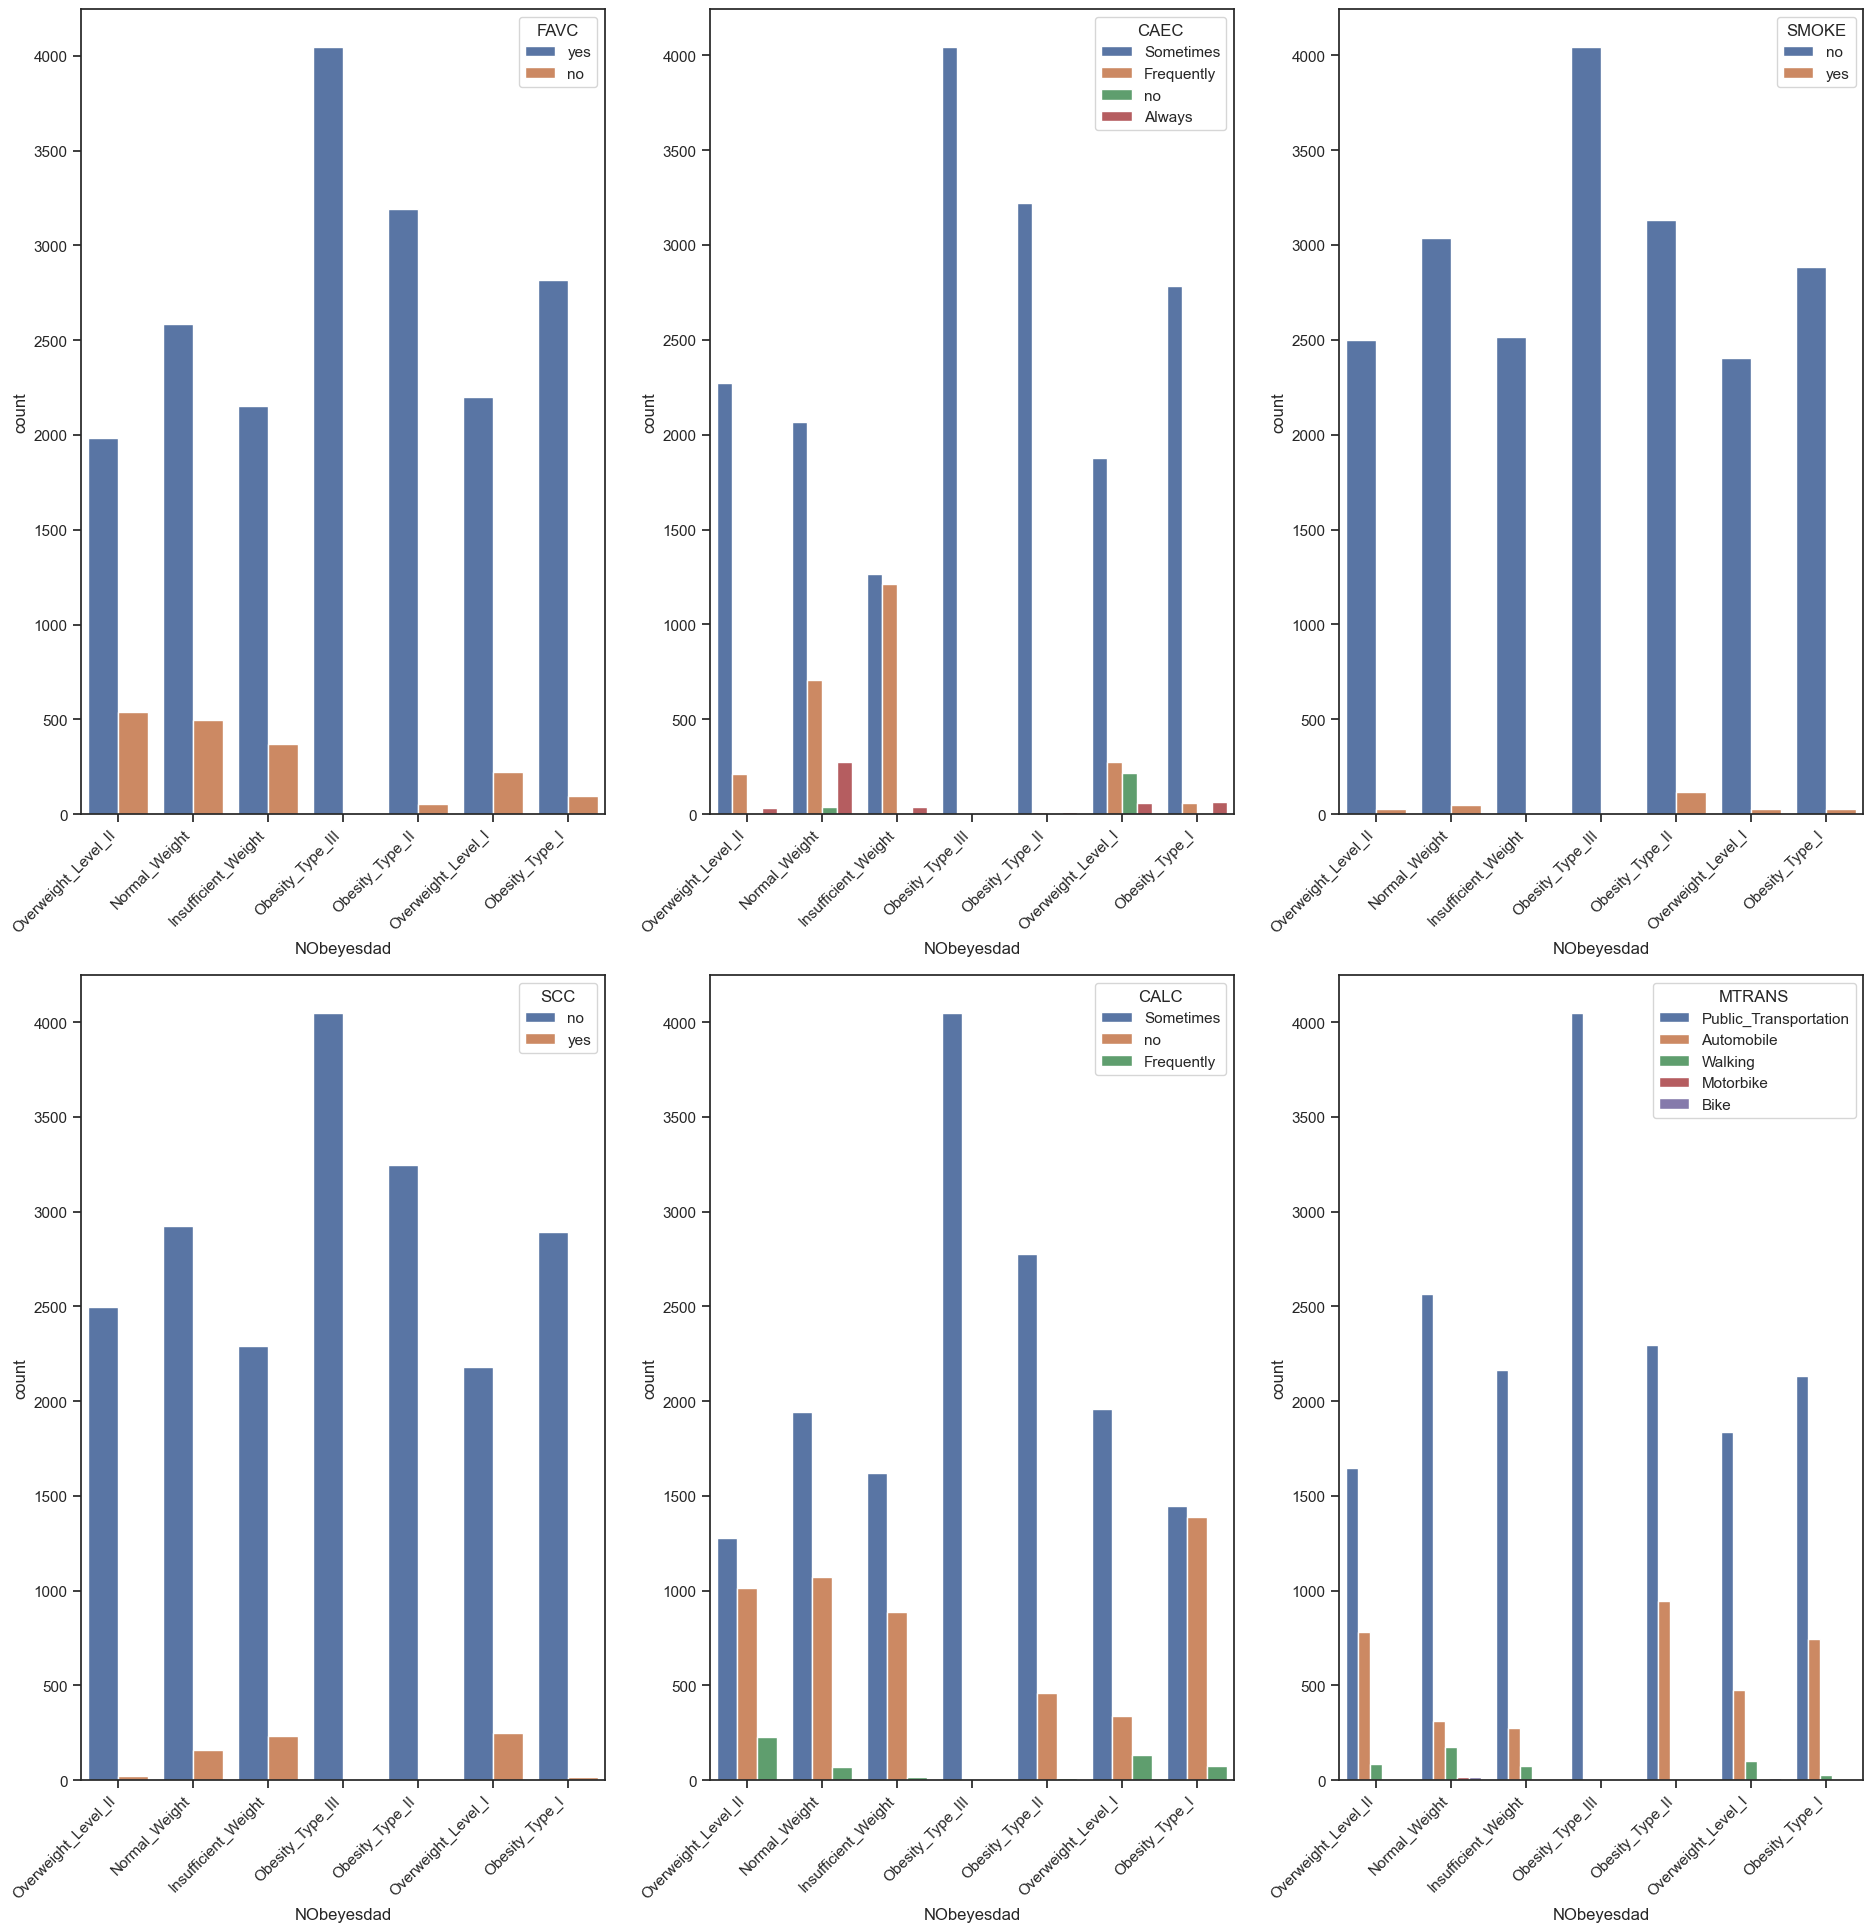

In [471]:
dataset = ['FAVC','CAEC','SMOKE', 'SCC', 'CALC', 'MTRANS']

fig , ax = plt.subplots(2,3,figsize=(23,23))
sns.set(style="ticks", color_codes='C0')
for axis,col in zip(ax.flat,dataset):
   
    my_plot = sns.countplot(x=train_df["NObeyesdad"],hue=train_df[col],ax=axis)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

#### The smoking habit, Consumption of alcohol (CALC) and Calories consumption monitoring (SCC), seem to have no relation with obesity. Obesity type III and obesity type II are high among those who have a family history with overweight. Additionally, obesity type III is high among those who use public transportation. 

* ### Distribution of numerical features Vs the traget variable

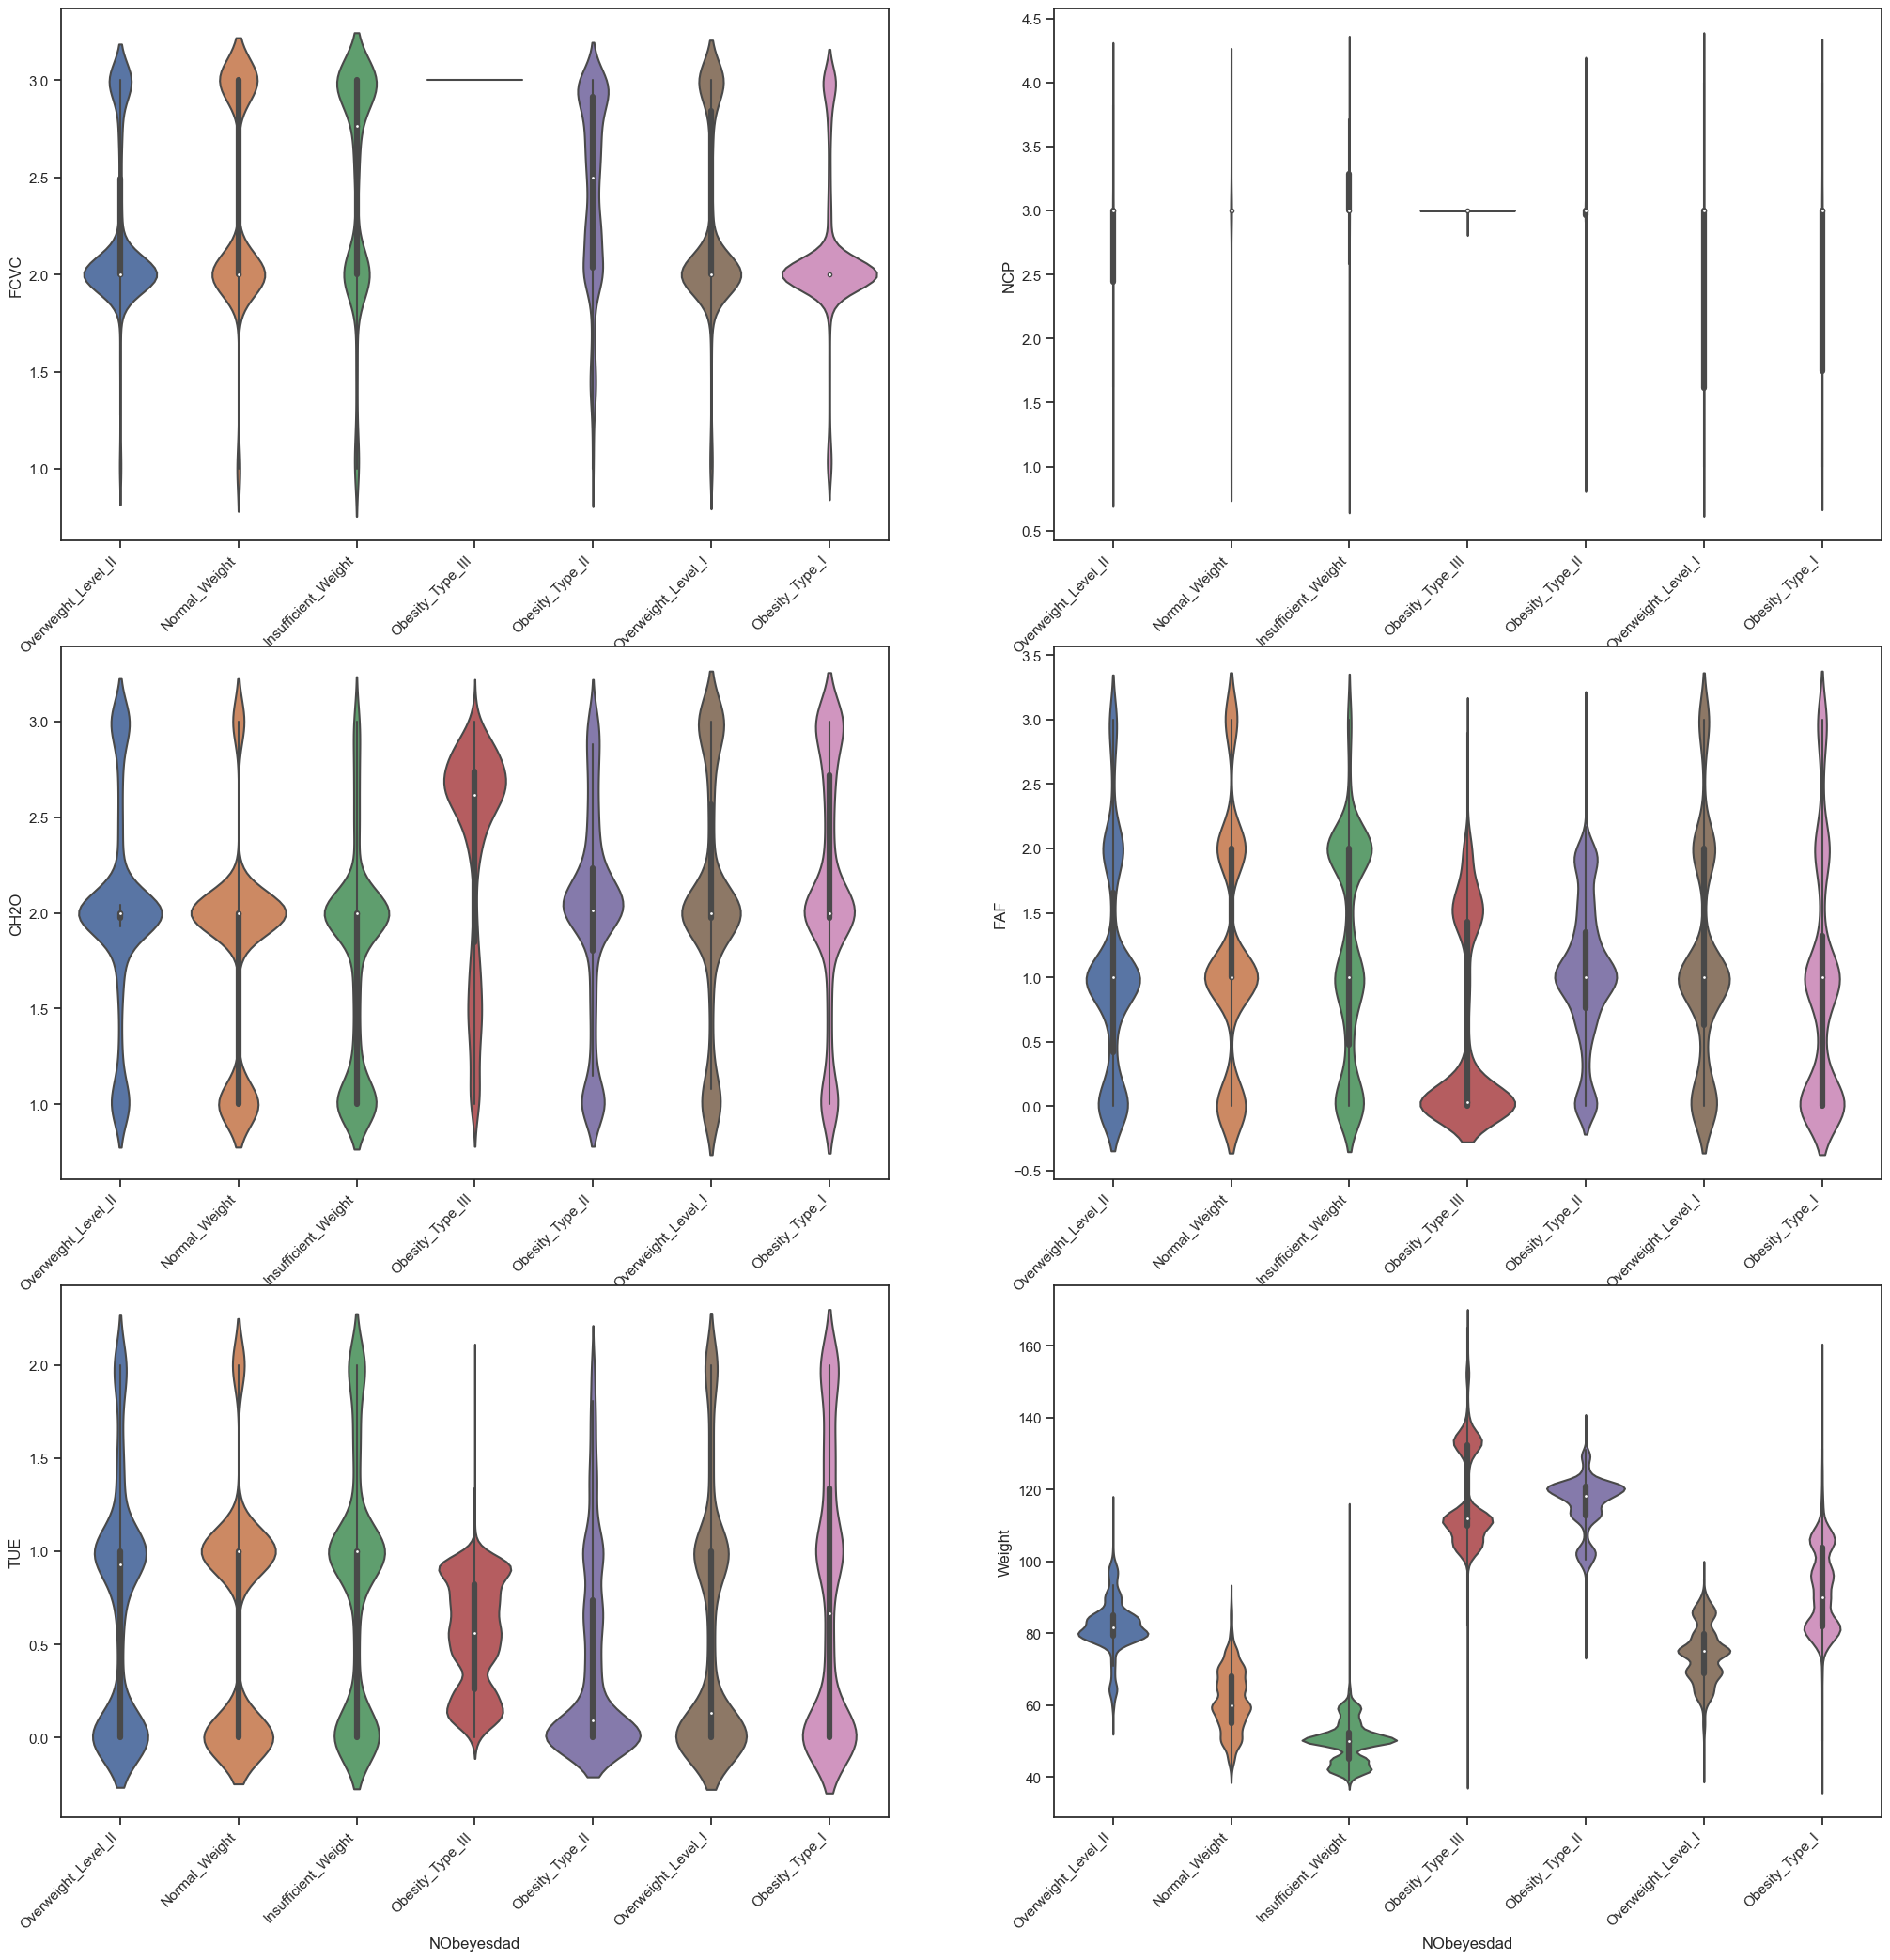

In [472]:
dataset = ['FCVC', 'NCP','CH2O', 'FAF', 'TUE', 'Weight']

fig , ax = plt.subplots(3,2,figsize=(25,25))
sns.set(style="ticks", color_codes='C0')
for axis,col in zip(ax.flat,dataset):
   
    my_plot = sns.violinplot(x=train_df["NObeyesdad"],y =train_df[col],ax=axis)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Data Preprocessing

* ## Recoding Catagorical variables 

In [473]:
print(train_df['NObeyesdad'].unique())

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [474]:
# Recoding the target variable
NObeyesdad ={'Insufficient_Weight': 0, 'Normal_Weight': 1,'Overweight_Level_I': 2, 'Overweight_Level_II': 3,
            'Obesity_Type_I': 4, 'Obesity_Type_II': 5,'Obesity_Type_III': 6}
train_df['NObeyesdad'].replace(NObeyesdad, inplace = True)


train_df['NObeyesdad']

0        3
1        1
2        0
3        6
4        3
        ..
20753    5
20754    0
20755    5
20756    3
20757    5
Name: NObeyesdad, Length: 20758, dtype: int64

In [475]:
# Recoding catagorical variable 
 

from sklearn import preprocessing
Label_Encoder = preprocessing.LabelEncoder()

cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]

for col in cols:
    train_df[col] = Label_Encoder.fit_transform(train_df[col])
    test_temp[col] = Label_Encoder.fit_transform(test_temp[col])
    print(Label_Encoder.classes_)

train_df.head(5)

['Female' 'Male']
['no' 'yes']
['no' 'yes']
['Always' 'Frequently' 'Sometimes' 'no']
['no' 'yes']
['no' 'yes']
['Always' 'Frequently' 'Sometimes' 'no']
['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,3,28.259565
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1,23.422091
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0,17.126706
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,6,44.855798
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,3,25.599151


* ## Correlation of the features with the target variable

In [476]:

train_df.corr()['NObeyesdad'].sort_values()

FAF                              -0.234745
CALC                             -0.189361
SCC                              -0.184959
TUE                              -0.121009
Gender                           -0.067699
MTRANS                            0.000064
SMOKE                             0.013501
NCP                               0.027227
Height                            0.150141
FAVC                              0.215401
FCVC                              0.272933
CH2O                              0.273154
Age                               0.356211
CAEC                              0.364052
family_history_with_overweight    0.522026
Weight                            0.921250
BMI                               0.961441
NObeyesdad                        1.000000
Name: NObeyesdad, dtype: float64

#### MTRANS, SMOKE and NCP appear to have very low correlation with level of obesity( NObeyesdad). But dropping them didn't improve the models.

In [477]:
#train_df.drop ([ 'MTRANS', 'SMOKE', 'NCP', 'Gender', 'Height', 'CALC', 'SCC', 'TUE', 'Height'], axis = 1, inplace =True)

#test_df.drop([ 'MTRANS', 'SMOKE', 'NCP', 'Gender', 'Height', 'CALC', 'SCC', 'TUE', 'Height'], axis=1, inplace=True)

# Splitting the Dataset

## Splitting the dataset into train and test with 80%- to 20% ratio.

In [478]:
X= train_df.drop(['NObeyesdad'], axis = 1)

y = train_df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [479]:
print(X)

       Gender        Age    Height      Weight  \
0           1  24.443011  1.699998   81.669950   
1           0  18.000000  1.560000   57.000000   
2           0  18.000000  1.711460   50.165754   
3           0  20.952737  1.710730  131.274851   
4           1  31.641081  1.914186   93.798055   
...       ...        ...       ...         ...   
20753       1  25.137087  1.766626  114.187096   
20754       1  18.000000  1.710000   50.000000   
20755       1  20.101026  1.819557  105.580491   
20756       1  33.852953  1.700000   83.520113   
20757       1  26.680376  1.816547  118.134898   

       family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                                   1     1  2.000000  2.983297     2      0   
1                                   1     1  2.000000  3.000000     1      0   
2                                   1     1  1.880534  1.411685     2      0   
3                                   1     1  3.000000  3.000000     2      0   

In [480]:
print(y)

0        3
1        1
2        0
3        6
4        3
        ..
20753    5
20754    0
20755    5
20756    3
20757    5
Name: NObeyesdad, Length: 20758, dtype: int64


# Model Training

* ## LGMC Classifier

In [481]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [482]:
from lightgbm import LGBMClassifier
lgbm_clf_2 = LGBMClassifier(objective= "multiclass", metric= "multi_logloss",verbosity= -1, 
                            boosting_type= "gbdt", random_state= 42, num_class= 8, learning_rate= 0.04, 
                            n_estimators= 500, lambda_l1= 0.009, lambda_l2= 0.004, max_depth= 10,
                            colsample_bytree= 0.41, subsample= 1, min_child_samples= 26,verbose=100)
lgbm_clf_2.fit(X_train, y_train)
y_pred=lgbm_clf_2.predict(X_test)

print(" LGBM Classifier's accuracy is :",accuracy_score(y_pred, y_test))


 LGBM Classifier's accuracy is : 0.9072736030828517


In [483]:
#Classification report

print(classification_report(y_test, y_pred))
pd.crosstab(y_test, y_pred)



              precision    recall  f1-score   support

           0       0.95      0.94      0.94       524
           1       0.89      0.89      0.89       626
           2       0.79      0.80      0.80       484
           3       0.81      0.81      0.81       514
           4       0.87      0.87      0.87       543
           5       0.98      0.97      0.97       657
           6       1.00      1.00      1.00       804

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



col_0,0,1,2,3,4,5,6
NObeyesdad,,,,,,,
0,490,31,2,1,0,0,0
1,24,558,41,3,0,0,0
2,1,31,389,50,13,0,0
3,0,7,49,415,40,3,0
4,2,2,12,40,474,12,1
5,0,0,0,2,15,639,1
6,0,0,0,0,1,1,802


* ##  Random Forest

In [484]:
from sklearn.ensemble import RandomForestClassifier
rnd_forest = RandomForestClassifier(n_estimators = 500, random_state = 4)
rnd_forest.fit(X_train,y_train)
print("Random Forest accuracy is :",rnd_forest.score(X_test,y_test))

Random Forest accuracy is : 0.9000481695568401


* ##  XGBoost

In [485]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [486]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [487]:
model2 = XGBClassifier(max_depth=10,
                      subsample = 0.6,
                       n_estimators = 200,
                      learning_rate = 0.05,
                      min_child_weight = 4,
                      random_state=5,
                      reg_alpha = 1,
                      reg_lamba=1)
model2.fit(X_train, y_train)
y_predict = model2.predict(X_test)
print("XGB Classifier's accuracy is :", accuracy_score(y_test,y_predict))


XGB Classifier's accuracy is : 0.9065510597302505


# Model Deployment

LGBM Classifier's accuracy is the highest from the other models I tried.

In [488]:
y_preds = lgbm_clf_2.predict(test_temp)
y_preds = y_preds.ravel()
y_pred_t = pd.Series(y_preds)
y_pred_t=y_pred_t.map({0: 'Insufficient_Weight', 1: 'Normal_Weight',2: 'Overweight_Level_I', 3: 'Overweight_Level_II',
            4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'})
y_pred_t=y_pred_t.to_list()

submission1 = pd.DataFrame()
submission1['id'] = test_df.id
submission1['NObeyesdad']= y_pred_t
submission1.to_csv("Comp1_fu5452.csv", index = False)
submission1.head()



,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
